In [1]:
'''Code to plot Gibbs Free Energy Schematic Plot
Code by Scott Gleason, University of New South Wales (UNSW), Australia 
S.Gleason@student.unsw.edu.au, May 2015'''

'Code to plot Gibbs Free Energy Schematic Plot\nCode by Scott Gleason, University of New South Wales (UNSW), Australia \nS.Gleason@student.unsw.edu.au, May 2015'

In [2]:
'''Imports numpy, matplotlib, and glob libaries 
numpy & matplotlib allow for complex math
glob allows for pattern matching with * and ? wild cards
    (note glob's only function is glob (i.e. glob.glob('search critrea')))'''

%matplotlib inline
'Generates plots inline of the notebook. Commit out if want indivudual files'

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator #Used for minor axis ticks
import glob

In [3]:
def plotFile():
    '''Generates a plot of data from a file, and formates chart layout
    filename = file to anaylisied
    xAxis = Column of X-Axis Data (defaulted to 1st column)
    yAxis = Column of Y-Axis Data (defaulted to 2nd column)'''

    'Define Plot layout, axis lables, legends, etc'
    PlotLayout = {'fileName': 'Gibbs Free Energy', # Plot filename 
                  'title': 'Gibbs Free Energy', # Title lable
                  'titleFontSize': 20, # Title lable font size
                  'X-Lable': '$Temperature$', # X axis lable
                  'Y-Lable': '$G$', # Y axis lable
                  'axisFontSize': 16, # X & Y axis lable font size
                  'xAxisMax': 100, # upper scale limit for X axis
                  'yAxisMax': 100, # upper scale limit for y axis
                  'lineWeight': 1 # weight of line
                  }
    
    'Add PlotLayout objects to plot'
    plt.figure(PlotLayout['fileName'])
    plt.title(PlotLayout['title'], fontsize = PlotLayout['titleFontSize'])
    plt.xlabel(PlotLayout['X-Lable'], fontsize = PlotLayout['axisFontSize'])
    plt.ylabel(PlotLayout['Y-Lable'], fontsize = PlotLayout['axisFontSize'])
    
    'Add annotations to the plot'
    PlotAnnotate = [
        {'label': 'Tm', 'xPos': 50, 'yPos': 90, 'colour': 'k'},
        {'label': 'Tg', 'xPos': 16.5, 'yPos': 90, 'colour': 'k'}]
    
    for i in PlotAnnotate:
        plt.annotate(i['label'], xy=(i['xPos'], 0),
                     xytext=(i['xPos'], i['yPos']),
                     arrowprops=dict(arrowstyle="-", linewidth = 0.75,
                                     color=i['colour']),
                     horizontalalignment='center')
    
    'Turns on minor axis ticks'
    #plt.minorticks_on()
    ax = plt.subplot(1, 1, 1)
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    
    'Generates the plot'
    plt.plot([0, 100], [90, 10], color='r', linestyle='-', 
             linewidth=PlotLayout['lineWeight']) #Liquid
    plt.plot([0, 100], [70, 30], color='g', linestyle='-',
             linewidth=PlotLayout['lineWeight']) #Solid
    plt.plot([0, 100], [80, 60], color='b', linestyle='-',
             linewidth=PlotLayout['lineWeight']) #Glass
    plt.axis([0, PlotLayout['xAxisMax'], 0, PlotLayout['yAxisMax']])
    plt.show()

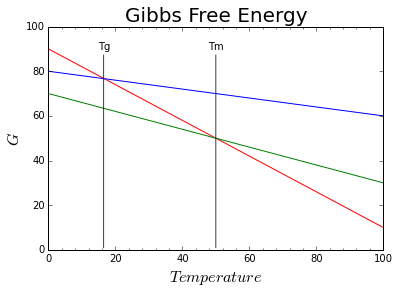

In [4]:
plotFile()